# Load Functions

## 0. imports

In [1]:
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
import mne

from utils import *
from eeg import compute_eeg_pipeline, test_eeg_pipeline
from ecg_qc import ecg_qc 
from eda_qc import eda_qc
from rsp_qc import *
from mic_qc import *
from lsl_problem import *
from et_qc import *
from webcam_qc import webcam_qc

# subject = "P5029423"
# # xdf_filename = f'/Users/bryan.gonzalez/CUNY_subs/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
# xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'


ModuleNotFoundError: No module named 'cv2'

In [2]:
subject = '5182010'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-P{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'

# 1. EEG

Creating RawArray with float64 data, n_channels=128, n_times=299989
    Range : 0 ... 299988 =      0.000 ...   299.998 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=299989
    Range : 0 ... 299988 =      0.000 ...   299.998 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Removed notch frequencies (Hz):
     60.00 : 7482 windows
    120.00 : 7482 windows
    180.00 : 7482 windows
    239.00 : 7482 windows
    240.00 : 7482 windows
    241.00 : 7482 windows
    299.00 : 7482 windows
    300.00 : 7482 windows
    301.00 : 7482 windows
    359.00 : 7482 windows
    360.00 : 7482 windows
    361.00 : 7482 windows
    419.00 : 7482 windows
    420.00 : 7482 windows
    421.00 : 7482 windows
    479.00 : 7482 windows
    480.00 : 7482 windows
    481.00 : 7482 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 22
Total # of chunks: 6
Current chunk:
1
2
3
4
5
6

RANSAC done!


2025-05-15 12:34:53,140 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E14', 'E17', 'E21'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E1'), np.str_('E107'), np.str_('E108'), np.str_('E123'), np.str_('E127')], 'bad_all': ['Cz', np.str_('E108'), 'E21', 'E17', np.str_('E1'), np.str_('E107'), np.str_('E127'), 'E14', np.str_('E123')]}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 26
Total # of chunks: 5
Current chunk:
1
2
3
4
5

RANSAC done!


2025-05-15 12:35:40,849 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E107'], 'bad_by_hf_noise': ['E21', 'E17', 'E14'], 'bad_by_correlation': ['E108'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E94'), np.str_('E122'), np.str_('E39'), np.str_('E1'), np.str_('E127'), np.str_('E126'), np.str_('E123')], 'bad_all': ['Cz', 'E108', np.str_('E94'), np.str_('E122'), 'E21', 'E17', np.str_('E39'), np.str_('E1'), 'E107', np.str_('E127'), np.str_('E126'), 'E14', np.str_('E123')]}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 116 sensor positions
Interpolating 13 sensors


2025-05-15 12:35:41,195 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-05-15 12:36:50,633 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E107'], 'bad_by_hf_noise': ['E21', 'E17', 'E14'], 'bad_by_correlation': ['E108'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E94'), np.str_('E121'), np.str_('E122'), np.str_('E39'), np.str_('E1'), np.str_('E127'), np.str_('E126'), np.str_('E123')], 'bad_all': ['Cz', 'E108', np.str_('E94'), np.str_('E121'), np.str_('E122'), 'E21', 'E17', np.str_('E39'), np.str_('E1'), 'E107', np.str_('E127'), np.str_('E126'), 'E14', np.str_('E123')]}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 115 sensor positions
Interpolating 14 sensors


2025-05-15 12:36:50,951 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 43
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-05-15 12:37:34,780 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E107'], 'bad_by_hf_noise': ['E21', 'E17', 'E14'], 'bad_by_correlation': ['E108'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E108'), np.str_('E94'), np.str_('E121'), np.str_('E122'), np.str_('E39'), np.str_('E1'), np.str_('E127'), np.str_('E126'), np.str_('E123')], 'bad_all': ['Cz', 'E108', np.str_('E94'), np.str_('E121'), np.str_('E122'), 'E21', 'E17', np.str_('E39'), np.str_('E1'), 'E107', np.str_('E127'), np.str_('E126'), 'E14', np.str_('E123')]}
2025-05-15 12:37:34,780 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 115 sensor positions
Interpolating 14 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 64
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Found 12 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['E107']

3 by HF noise: ['E14', 'E17', 'E21']

0 by correlation: []

0 by SNR: []

0 by dropout: []

8 by RANSAC: [np.str_('E1'), np.str_('E39'), np.str_('E108'), np.str_('E122'), np.str_('E123'), np.str_('E126'), np.str_('E127'), np.str_('Cz')]

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 117 sensor positions
Interpolating 12 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.4s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 65
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Bad channels before robust reference: ['Cz', np.str_('E108'), 'E21', 'E17', np.str_('E1'), np.str_('E107'), np.str_('E127'), 'E14', np.str_('E123')]
Interpolated channels: [np.str_('E108'), np.str_('Cz'), np.str_('E122'), 'E21', 'E17', np.str_('E1'), np.str_('E39'), 'E107', np.str_('E127'), np.str_('E126'), 'E14', np.str_('E123')]
Bad channels after interpolation: [np.str_('E115'), np.str_('E121'), np.str_('E125')]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


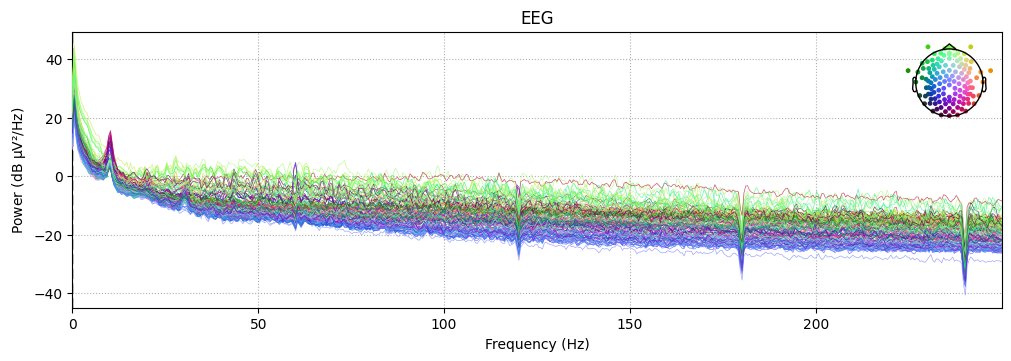

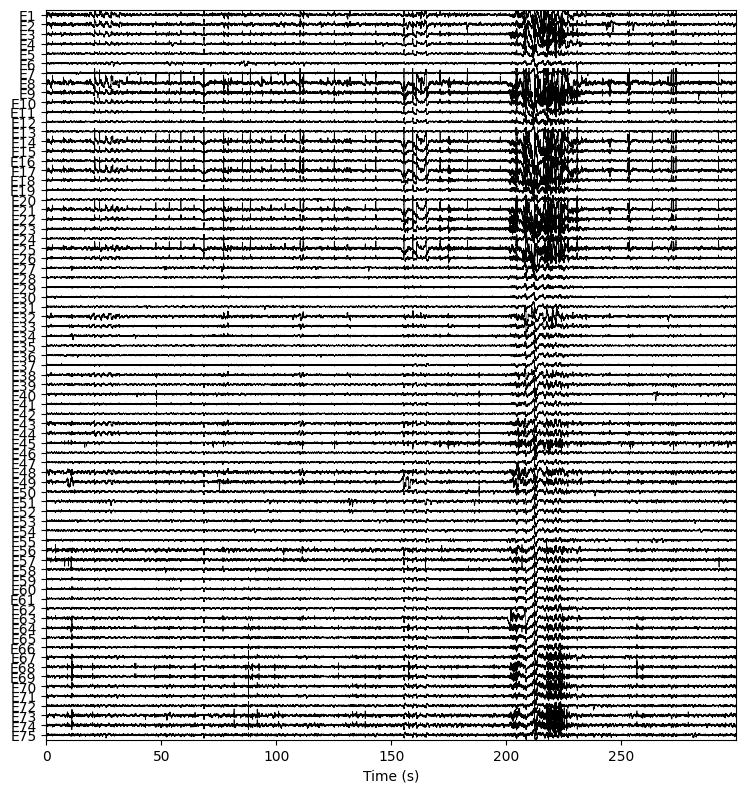

AttributeError: 'MNEBrowseFigure' object has no attribute 'grab'

In [8]:
#Compute the eeg vars
eeg_vars = compute_eeg_pipeline(xdf_filename)

# 2. ECG

In [ ]:
ecg_vars

In [ ]:
[ecg_vars, ecg_plt] = ecg_qc(xdf_filename)


# 3. EDA

In [ ]:
[eda_vars, eda_plt1, eda_plt2] = eda_qc(xdf_filename)

In [ ]:
# Sample data for the table
data = [
    ["variable", "value"],
    ["bad channels before", str(eeg_vars["bad_channels_before"])],
    ["interpolated channels", str(eeg_vars["interpolated_channels"])],
    ["bad channels after", str(eeg_vars["bad_channels_after"])],
   ["percentage of good data", str(eeg_vars["percent_good"])],
]

# 4. RSP

In [9]:
rsp_vars = rsp_qc(xdf_filename)

Effective sampling rate: 494.908
Signal to Noise Ratio: 6.459
Breath amplitude mean: 0.170
Breath amplitude std: 0.216
Breath amplitude range: 0.026 - 2.001
Respiration rate mean: 20.768
Respiration rate std: 2.928
Respiration rate range: 6.705 - 28.010
Peak to peak interval mean: 2.366
Peak to peak interval std: 1.540
Peak to peak interval range: 0.486 - 25.796
Baseline drift: 0.057
Autocorrelation at typical breath cycle: 0.081


In [10]:
rsp_vars

{'sampling_rate': np.float64(494.9080841125127),
 'rsp_snr': np.float64(6.4592950633914805),
 'breath_amplitude_mean': np.float64(0.17026324452494762),
 'breath_amplitude_std': np.float64(0.21641422344415842),
 'breath_amplitude_range': '0.026 - 2.001',
 'rsp_rate_mean': np.float64(20.767729722710772),
 'rsp_rate_std': np.float64(2.9282710556409492),
 'rsp_rate_range': '6.705 - 28.010',
 'ptp_mean': np.float64(2.3658041838797823),
 'ptp_std': np.float64(1.5402879384613746),
 'ptp_range': '0.486 - 25.796',
 'baseline_drift': np.float64(0.056999690807901786),
 'autocorrelation': np.float64(0.08105735273257382)}

# 5. Mic

In [11]:
mic_vars = mic_qc(xdf_filename)

Effective sampling rate: 44097.490
Difference between .wav file and lsl timestamps durations: 0.106
number of NaN's: 0 
percent of NaN's: 0.000%
mic samples first quartile: -30.0 
mic samples third quartile: 29.0
mic samples standard deviation: 212.958
mic samples min: -9616 
mic samples max: 8985


# 6. Webcam

In [ ]:
vars = webcam_qc(xdf_filename==xdf_filename,
                video_file=video_filename, task='RestingState')

NameError: name 'webcam_qc' is not defined

In [ ]:
# Sample data for the table
data = [
    ["variable", "value"],
    ["bad channels before", str(eeg_vars["bad_channels_before"])],
    ["interpolated channels", str(eeg_vars["interpolated_channels"])],
    ["bad channels after", str(eeg_vars["bad_channels_after"])],
   ["percentage of good data", str(eeg_vars["percent_good"])],
]

NameError: name 'eeg_vars' is not defined

# 7. ET

Effective sampling rate: 119.996
all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter)
Flag: all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter): True
% NaNs is the same between UCS and TBCS (gaze origin) and between UCS and display area (gaze point)
Flag: % of NaNs is the same between coordinate systems (UCS and TBCS (gaze origin) and between UCS and display area (gaze point)): True
Mean difference in percent valid data between right and left eyes: 3.060%
Percent of data with gaze point differences of over 0.2 mm: 6.925%


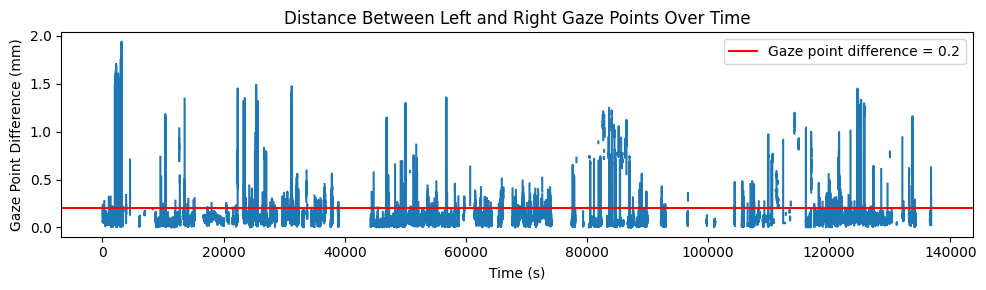

In [3]:
et_vars = et_qc(xdf_filename)

# Stream Durations 

### functions are in utils.py (but should be called in the report)

In [12]:
get_durations(ExperimentPart='Experiment', xdf_path=xdf_filename)

mic is shorter than expected for Experiment by 360.68 seconds

Experiment DataFrame


,stream,duration,mm:ss,percent
2,mic,1808.2050,0:30:08,83.37%
3,cam,2168.8410,0:36:09,100.0%
0,et,2168.8770,0:36:09,100.0%
1,ps,2168.8780,0:36:09,100.0%
4,eeg,2168.8800,0:36:09,100.0%
5,expected,2168.8808,0:36:09,100.0%


In [13]:
get_durations('RestingState', xdf_filename)


RestingState DataFrame


,stream,duration,mm:ss,percent
3,cam,299.9630,0:05:00,99.99%
0,et,299.9940,0:05:00,100.0%
4,eeg,299.9980,0:05:00,100.0%
1,ps,299.9990,0:05:00,100.0%
5,expected,299.9996,0:05:00,100.0%


In [14]:
# i wont run these but they are here for reference
# get_durations('CampFriend', xdf_filename)
# get_durations('SocialTask', xdf_filename)

In [15]:
whole_durations(xdf_filename)

mic is shorter than expected by 421.55 seconds


,stream,duration,mm:ss,percent
2,mic,1863.106,0:31:03,81.55%
3,cam,2257.440,0:37:37,98.81%
0,et,2257.455,0:37:37,98.81%
1,ps,2284.446,0:38:04,99.99%
4,eeg,2284.655,0:38:05,100.0%


# LSL Problem

In [16]:
lsl_vars = lsl_problem(xdf_filename)

    subject modality  num_losses percent_lost
0  P5287460       ps           1       1.033%
    subject modality  num_losses percent_lost
0  P5287460       ps           1       1.085%


In [17]:
pprint(lsl_vars)

{'loss_before_social_task':     subject modality  num_losses percent_lost
0  P5287460       ps           1       1.085%,
 'percent_loss':     subject modality  num_losses percent_lost
0  P5287460       ps           1       1.033%}


# Report

## 1. Set up Document

In [ ]:


# Set up the document
doc = SimpleDocTemplate("example_report.pdf", pagesize=LETTER)
styles = getSampleStyleSheet()
story = []

# Add a title
title = Paragraph(f"Subject Report: {subject}", styles["Title"])
story.append(title)
story.append(Spacer(1, 20))

# Add a paragraph
text = f"""
Collection Date: {get_collection_date(xdf_filename)} 
"""
paragraph = Paragraph(text, styles["BodyText"])
story.append(paragraph)
story.append(Spacer(1, 20))




In [ ]:
# Add a subtitle
subtitle = Paragraph(f"EEG", styles["Heading2"], )
story.append(subtitle)
story.append(Spacer(1, 5))

# Add a paragraph
text = f"""
Data preprocessed by performing <b>line noise removal</b>, <b>robust referencing</b>, and <b>bad channel detection/interpolation</b> using PyPrep pipeline. First, the pipeline applies a notch filter at 60 Hz and its harmonics to remove power line noise. Then, it performs <b>robust average referencing</b>, where it detects bad channels, interpolates them using surrounding signals, and computes a median-based reference across EEG channels. This ensures a stable reference even in the presence of noisy electrodes. The final output is a cleaned EEG dataset with a consistent reference, ready for further analysis.
"""

paragraph = Paragraph(text, styles["BodyText"], )
story.append(paragraph)
story.append(Spacer(1, 20))

## Computer the EEG variables (will take time)

In [ ]:
# add an image
from reportlab.lib.units import inch
from reportlab.platypus import Image
image = Image("/Users/bryan.gonzalez/MOBI_QC/src/MOBI_QC/report_images/P5029423_eeg_annotations.png", 7*inch, 3*inch)
image.hAlign = 'CENTER'
story.append(image)

In [ ]:
story.append(Spacer(1, 20))

In [ ]:



# Define the table style to make all borders white
style = TableStyle([
    ('GRID', (0,0), (-1,-1), 1, colors.white),  # All grid lines white
    ('BOX', (0,0), (-1,-1), 1, colors.white),   # Outer box white
    ('INNERGRID', (0,0), (-1,-1), 1, colors.white)  # Inner grid white
])
# Create the table
table = Table(data, style=style)
# Apply style
#table.setStyle(style)
story.append(table)
#story.append(Spacer(1, 20))

In [ ]:
# Build the PDF
doc.build(story)

In [ ]:
table